In [1]:
import pandas 
import pandas as pd
cd=pandas.read_csv(r'/Users/manick/Python Training/dataset/carsdata.csv',encoding='iso-8859-1')

cd=cd.drop(columns=['Model','Trim'])
cd.head()


,Price,Mileage,Make,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Sedan,6,3.1,4,1,0,1


In [2]:
df1=cd.loc[:,['Type','Make']]
df1.corr()

""


In [3]:
catg_var = cd.loc[:,['Type','Make']]
catg_df=pd.get_dummies(catg_var)

In [4]:
newfile=pd.concat([cd,catg_df],axis=1)
newfile.head()

,Price,Mileage,Make,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,...,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,17314.10313,8221,Buick,Sedan,6,3.1,4,1,1,1,...,0,0,1,0,1,0,0,0,0,0
1,17542.03608,9135,Buick,Sedan,6,3.1,4,1,1,0,...,0,0,1,0,1,0,0,0,0,0
2,16218.84786,13196,Buick,Sedan,6,3.1,4,1,1,0,...,0,0,1,0,1,0,0,0,0,0
3,16336.91314,16342,Buick,Sedan,6,3.1,4,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,16339.17032,19832,Buick,Sedan,6,3.1,4,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [5]:
indata=newfile.drop(columns=['Make','Type'])
indata.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,17314.10313,8221,6,3.1,4,1,1,1,0,0,0,1,0,1,0,0,0,0,0
1,17542.03608,9135,6,3.1,4,1,1,0,0,0,0,1,0,1,0,0,0,0,0
2,16218.84786,13196,6,3.1,4,1,1,0,0,0,0,1,0,1,0,0,0,0,0
3,16336.91314,16342,6,3.1,4,1,0,0,0,0,0,1,0,1,0,0,0,0,0
4,16339.17032,19832,6,3.1,4,1,0,1,0,0,0,1,0,1,0,0,0,0,0


In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
x1 = indata.drop(columns=['Price'])
y1 = indata['Price'] 

linmod2 = LinearRegression()
rfemod = RFE(linmod2,1)
rfemod.fit(x1,y1)
rfemod.ranking_
x1.columns

varlist = x1.columns
rating = rfemod.ranking_
pd.DataFrame([varlist,rating])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
1,18,14,4,11,17,15,16,2,10,12,13,5,9,1,7,6,3,8


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linmod = LinearRegression()
x1 = indata.loc[:,['Make_Cadillac','Type_Convertible','Make_SAAB','Liter','Type_Wagon']]
y1 = indata['Price']
linmod.fit(x1,y1)
predPrice = linmod.predict(x1)
r2 = r2_score(y1,predPrice)

n = len(y1)    # Number of Samples
p = x1.shape[1] # Number of Input variables
adjr2 = 1 - (1-r2)*(n-1)/ (n-p-1)
print(r2,adjr2)




0.9090408381696332 0.9084709186092925


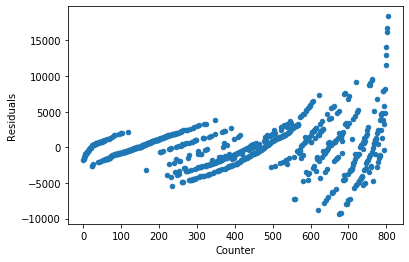

In [8]:
%matplotlib inline
indata ['Residuals'] = y1-predPrice
indata = indata.sort_values (by='Price')
indata['Counter'] = range(0,len(y1))
indata.plot.scatter(x ='Counter', y ='Residuals')

In [9]:
#1.Check if the values appear random on both sides of the zero line scatter plot.
#2.Roughly equal number of points on both the sides of line(Scatterplot)
#3.No visible pattern emerging there
#4.Check for funnel - Hetroskedacity
#5.Most of the data ponits -Closer to zero (histogram)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D775A2EB8>]],
      dtype=object)

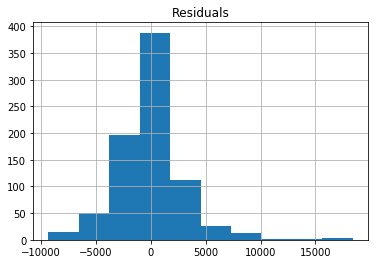

In [30]:
indata.hist('Residuals')